# 1. Setup and Load Data

In [1]:
# ====================================================
# Setup & Imports
# ====================================================

import warnings
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns 
from tabulate import tabulate


warnings.filterwarnings('ignore')

In [2]:
# --- 1. Load Dataset ---
print("Loading Dataset ...")
dataset = pd.read_csv('/Users/victorhugo/Documents/Work/Data Science/Projects/test_a_b/digital_marketing_campaign_dataset.csv')

# --- 2. Shape of dataset ---
print('\n --- Dataset Shape ---')
print(f'dataset: {dataset.shape}')

Loading Dataset ...

 --- Dataset Shape ---
dataset: (8000, 20)


# 2. Exploratory Data Analysis (EDA)

## 2.1. Data Info

In [3]:
dataset.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
summary = pd.DataFrame({
    'Datatype':dataset.dtypes,
    "Non-null count": dataset.notnull().sum(),
    'Unique Values': dataset.nunique(),
    'Missing Values': dataset.isna().sum(),
    'Missing %' : (dataset.isna().sum()/ len(dataset))*100
})

summary

,Datatype,Non-null count,Unique Values,Missing Values,Missing %
CustomerID,int64,8000,8000,0,0.0
Age,int64,8000,52,0,0.0
Gender,object,8000,2,0,0.0
Income,int64,8000,7789,0,0.0
CampaignChannel,object,8000,5,0,0.0
CampaignType,object,8000,4,0,0.0
AdSpend,float64,8000,8000,0,0.0
ClickThroughRate,float64,8000,8000,0,0.0
ConversionRate,float64,8000,8000,0,0.0
WebsiteVisits,int64,8000,50,0,0.0


In [5]:
# Data Unbalanced 
dataset['Conversion'].value_counts(normalize = True)

Conversion
1    0.8765
0    0.1235
Name: proportion, dtype: float64

In [6]:
# Features that bring no value: 

advert_plat= dataset['AdvertisingPlatform'].unique()[0]
campaign_channel = dataset['AdvertisingTool'].unique()[0]

print('\n --- Categorical Features with NO variations ---')

no_relevance = pd.DataFrame({
    'Feature': ['AdvertisingPlatform', 'CampaignChannel'],
    'Unique Value': [advert_plat, campaign_channel]
})

print('\n',no_relevance)



 --- Categorical Features with NO variations ---

                Feature Unique Value
0  AdvertisingPlatform     IsConfid
1      CampaignChannel   ToolConfid


In [7]:
# Since these columns bring no predictive value, i will drop them to reduce noise and simplify the modeling


print(" Initial Number of Columns : ", len(dataset.columns) )
excluded_initial_columns = ['CustomerID','AdvertisingPlatform','AdvertisingTool']
print('\n --- Dropped Columns ---')
print(excluded_initial_columns)

dataset = dataset.drop(excluded_initial_columns, axis =1)


print("\n Number of Columns now: ",len(dataset.columns) )


 Initial Number of Columns :  20

 --- Dropped Columns ---
['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool']

 Number of Columns now:  17


In [8]:
# Separating Categorical and Numeric Columns

num_features = [
    col for col in dataset.select_dtypes(include=np.number).columns
    if col not in excluded_initial_columns
]

cat_features = [
    col for col in dataset.select_dtypes(exclude=np.number).columns
    if col not in excluded_initial_columns
]

print('=== NUMERIC FEATURES (incl. CustomerID) ===')
print(f"Count: {len(num_features)}")
print(num_features)

print('\n=== CATEGORICAL FEATURES ===')
print(f"Count: {len(cat_features)}")
print(cat_features)

=== NUMERIC FEATURES (incl. CustomerID) ===
Count: 14
['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']

=== CATEGORICAL FEATURES ===
Count: 3
['Gender', 'CampaignChannel', 'CampaignType']


In [9]:
dataset.describe()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


# 2.2 Categorical Features

=== CATEGORICAL FEATURES vs CONVERSION ===



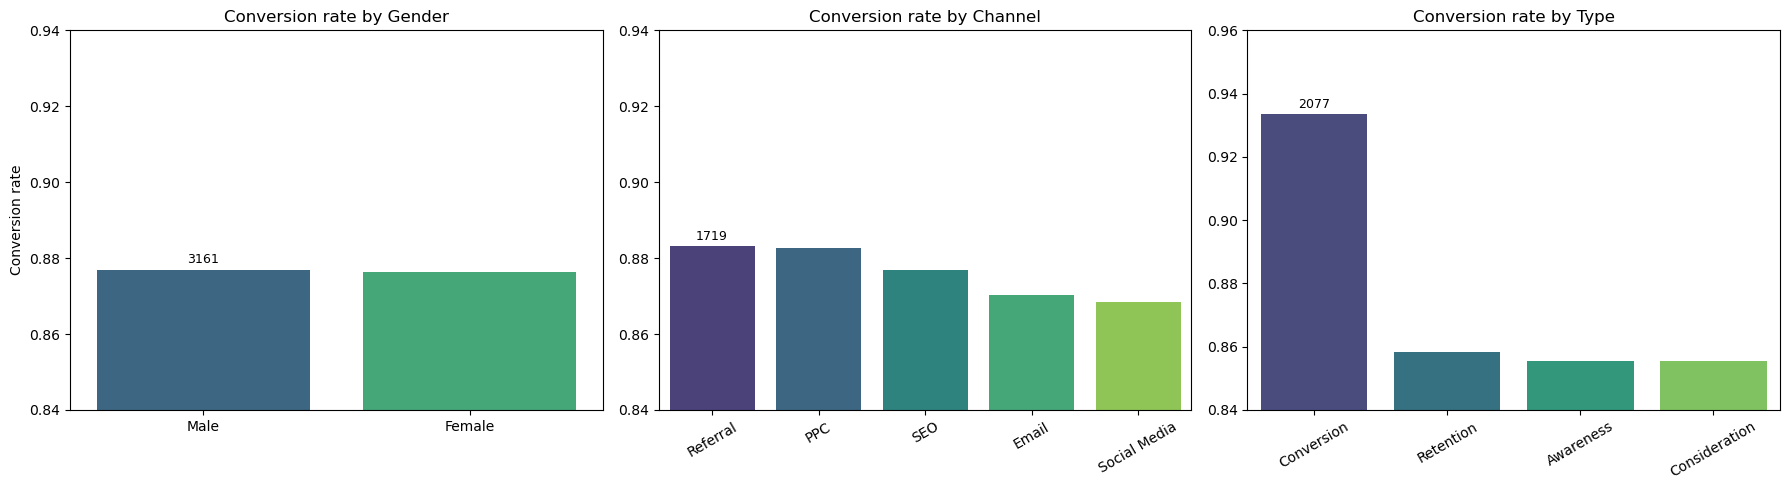

In [10]:
print("=== CATEGORICAL FEATURES vs CONVERSION ===\n")


def conv_summary(df, col):
    grp = df.groupby(col)['Conversion']
    return pd.DataFrame({
        'Count': grp.size(),
        'Conversion_Rate': grp.mean()
    }).reset_index().sort_values('Conversion_Rate', ascending=False)

gender_stats   = conv_summary(dataset, 'Gender')
channel_stats  = conv_summary(dataset, 'CampaignChannel')
type_stats     = conv_summary(dataset, 'CampaignType')

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# 1) Gender
sns.barplot(data=gender_stats, x='Gender', y='Conversion_Rate',
            ax=axes[0], palette='viridis')
axes[0].set_title('Conversion rate by Gender')
axes[0].set_ylabel('Conversion rate')
axes[0].set_xlabel('')
axes[0].set_ylim(0.84, 0.94)  # zoom
for bar, (_, row) in zip(axes[0].containers[0], gender_stats.iterrows()):
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    axes[0].text(x, y + 0.001, f"{row['Count']}",
                 ha='center', va='bottom', fontsize=9)
# 2) CampaignChannel
sns.barplot(data=channel_stats, x='CampaignChannel', y='Conversion_Rate',
            ax=axes[1], palette='viridis')
axes[1].set_title('Conversion rate by Channel')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_ylim(0.84, 0.94)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30)
for bar, (_, row) in zip(axes[1].containers[0], channel_stats.iterrows()):
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    axes[1].text(x, y + 0.001, f"{row['Count']}",
                 ha='center', va='bottom', fontsize=9)

# 3) CampaignType
sns.barplot(data=type_stats, x='CampaignType', y='Conversion_Rate',
            ax=axes[2], palette='viridis')
axes[2].set_title('Conversion rate by Type')
axes[2].set_ylabel('')
axes[2].set_xlabel('')
axes[2].set_ylim(0.84, 0.96)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=30)
for bar, (_, row) in zip(axes[2].containers[0], type_stats.iterrows()):
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    axes[2].text(x, y + 0.001, f"{row['Count']}",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [11]:
#Categorical Summary

print("=== CATEGORICAL SUMMARY ===\n")
tables = {
    "Gender": gender_stats,
    "CampaignChannel": channel_stats,
    "CampaignType": type_stats,
}

# get a few viridis colors (as hex) and map to ANSI
viridis = sns.color_palette("viridis", n_colors=3).as_hex()
ansi_colors = [
    "\033[38;2;253;231;37m",# yellow
    "\033[38;2;59;82;139m", # blue
    "\033[38;2;33;145;140m" # green
]
reset = "\033[0m"

for (name, df), color in zip(tables.items(), ansi_colors):
    print(f"{color}-- {name} --{reset}")
    print(
        tabulate(
            df,
            headers="keys",
            tablefmt="github",
            floatfmt=".4f",
            showindex=False
        )
    )
    print()

=== CATEGORICAL SUMMARY ===

-- Gender --
| Gender   |   Count |   Conversion_Rate |
|----------|---------|-------------------|
| Male     |    3161 |            0.8769 |
| Female   |    4839 |            0.8762 |

-- CampaignChannel --
| CampaignChannel   |   Count |   Conversion_Rate |
|-------------------|---------|-------------------|
| Referral          |    1719 |            0.8831 |
| PPC               |    1655 |            0.8828 |
| SEO               |    1550 |            0.8768 |
| Email             |    1557 |            0.8703 |
| Social Media      |    1519 |            0.8683 |

-- CampaignType --
| CampaignType   |   Count |   Conversion_Rate |
|----------------|---------|-------------------|
| Conversion     |    2077 |            0.9336 |
| Retention      |    1947 |            0.8582 |
| Awareness      |    1988 |            0.8556 |
| Consideration  |    1988 |            0.8556 |



In [12]:
# Chi-Square test
print("=== CHI-SQUARE TEST ===\n")

p_values = []
for col in cat_features:
    # Contingency table
    table = pd.crosstab(dataset[col], dataset['Conversion'])

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(table)
    
    # Append on p_values 
    p_values.append(p)

    print(f"\n=== {col} vs Conversion ===")
    print(table)
    print(f"chi2 = {chi2:.3f}, dof = {dof}, p-value = {p:.6f}")

    if p < 0.05:
        print("→ Reject H0: there is a significant association.\n")
    else:
        print("→ Fail to reject H0: no significant association.\n")

=== CHI-SQUARE TEST ===


=== Gender vs Conversion ===
Conversion    0     1
Gender               
Female      599  4240
Male        389  2772
chi2 = 0.004, dof = 1, p-value = 0.951031
→ Fail to reject H0: no significant association.


=== CampaignChannel vs Conversion ===
Conversion         0     1
CampaignChannel           
Email            202  1355
PPC              194  1461
Referral         201  1518
SEO              191  1359
Social Media     200  1319
chi2 = 2.785, dof = 4, p-value = 0.594450
→ Fail to reject H0: no significant association.


=== CampaignType vs Conversion ===
Conversion       0     1
CampaignType            
Awareness      287  1701
Consideration  287  1701
Conversion     138  1939
Retention      276  1671
chi2 = 84.454, dof = 3, p-value = 0.000000
→ Reject H0: there is a significant association.



In [13]:
dataset['CampaignType'].unique()

array(['Awareness', 'Retention', 'Conversion', 'Consideration'],
      dtype=object)

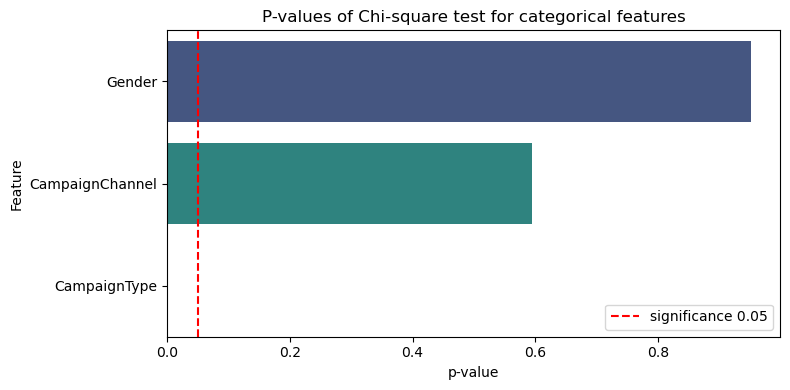

In [14]:
p_values_df = pd.DataFrame({
    'Feature': cat_features,
    'p-value': p_values
}).sort_values('p-value', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=p_values_df, x='p-value', y='Feature', palette='viridis')
plt.axvline(x=0.05, color='red', linestyle='--', label='significance 0.05')
plt.title('P-values of Chi-square test for categorical features')
plt.legend()
plt.tight_layout()
plt.show()

### Chi-square test:

For each categorical feature, a chi-square test of independence was run against the target `Conversion` (0/1). The null hypothesis \(H_0\) states that the feature and the conversion outcome are independent (no relationship), while the alternative \(H_1\) states that they are associated. 

- A **low p-value** typically means the observed differences in conversion rates across the categories are very unlikely to be due to random chance if \(H_0\) were true. In this case, \(H_0\) is rejected and the feature is considered **statistically associated** with conversion. Such features are *informative* and should be **kept** in the model. 

- A **high p-value**  means the data are compatible with \(H_0\); there is no strong evidence that conversion rates differ across the categories. In this case, there is no statistical evidence that the feature helps discriminate between converters and non-converters, so it is a good **candidate to drop** (especially if it also has low practical importance). 

In this dataset, `CampaignType` has an extremely small p-value, indicating a strong association with conversion; “Conversion” campaigns have a much higher conversion rate than the other types. This feature is therefore **important and is retained** as a predictor, not removed.


## 2.3 Numeric Features